# Prediction of Breast Cancer using Classification ML models, Python

The data comprises of 32 columns and 569 observations. 31 columns are numerical attributes of the Breast Cancer. The second column indicates the Status of the patient - B indicates benign/negligible Breast Cancer , and M indicates Malignant/Acute Breast cancer. The intent is to detect the presence of Breast cancer (whether the person has Breast cancer or not) based on the 31 variables. 
Benign(B) tumors are not considered cancerous: their cells are close to normal in appearance, they grow slowly, and they do not invade nearby tissues or spread to other parts of the body. Malignant(M) tumors are cancerous.

# Importing Libraries

In [1]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm

# Importing the Data for ML Project

In [61]:
breast_cancer_data = pd.read_csv("breast-cancer-data.csv")
breast_cancer_data=breast_cancer_data1.drop(['Unnamed: 32'],axis=1)

# Setting Display options to ensure feature name visibility

In [183]:
pd.set_option('display.max_columns',None)

In [9]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Understanding the structure of the data variables

In [10]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Except target column 'diagnosis', all other variables are numerical.

In [11]:
breast_cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# DATA CLEANING

### Outlier Analysis of Numerical Features

In [77]:
breast_cancer_data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Status
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
1%,8.458360,10.930400,53.827600,215.664000,0.068654,0.033351,0.000000,0.000000,0.129508,0.051504,...,15.200800,58.270400,256.192000,0.087910,0.050094,0.000000,0.000000,0.176028,0.058580,0.000000
5%,9.529200,13.088000,60.496000,275.780000,0.075042,0.040660,0.004983,0.005621,0.141500,0.053926,...,16.574000,67.856000,331.060000,0.095734,0.071196,0.018360,0.024286,0.212700,0.062558,0.000000
10%,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,...,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000


#### Since, for most of the columns minimum values exist that are less than 1% data. Similarly, maximum values exist exceeding 99% of the values. Therefore, outliers exist for this dataset.

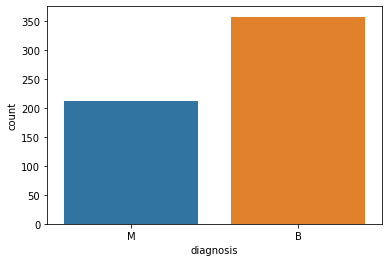

In [12]:
sns.countplot(x = 'diagnosis', data = breast_cancer_data)
plt.show()

- Benign(B) tumors are not considered cancerous: their cells are close to normal in appearance, they grow slowly, and they do not invade nearby tissues or spread to other parts of the body. Malignant(M) tumors are cancerous.

## Checking for missing values.

In [14]:
print(breast_cancer_data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#### Clearly, there are no missing values in this dataset. So, no imputation required.

In [21]:
breast_cancer_data.duplicated().sum()

0

#### There are no duplicate rows present in this dataset.

# Drop ID Feature from the dataset

In [52]:
breast_cancer_data=breast_cancer_data.drop(['id'],axis=1)

#### Compulsory drop of ID type of Features
- ID type features simply act as row identifiers when data get built into the database
- ID can falsely become the best predictor when it ideally should not be a driving factor for the outcome
- Since, this ID variable has least variance. It is not discriminatory enough. So, this variable needs to be dropped. This variable gives no idea or clue about detection of Malignant or Benign cancer.

# Correlation plot to check multi-collinearity in the dataset

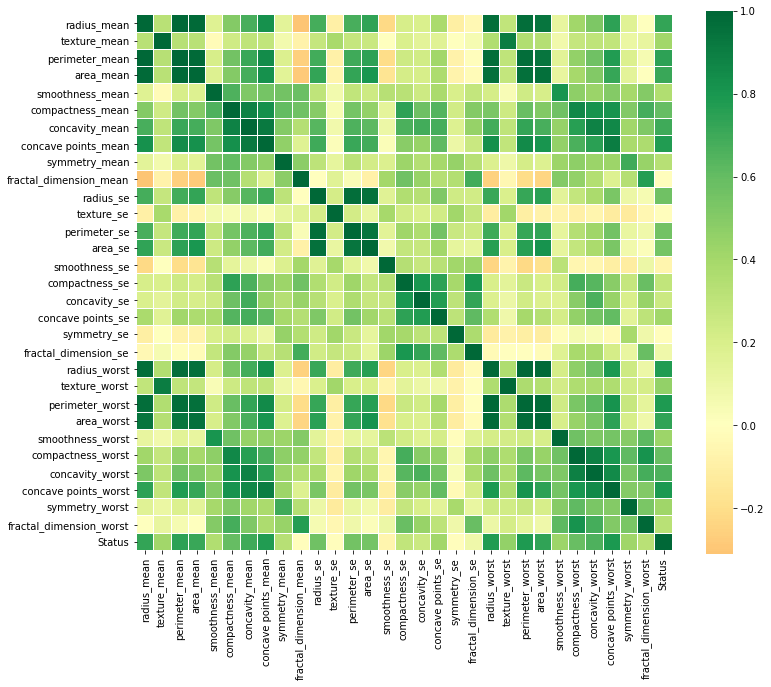

In [71]:
corr_breast = breast_cancer_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_breast, center=0, square=True,cmap ='RdYlGn', linewidths=0.05)
plt.show()

#### There is multi-collinearity present in the dataset. So, Logistic Regression as Classification model, wouldn't give very reliable results.

In [54]:
# Seeing the correlation values
corr_breast

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Status
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


- area_mean is strongly correlated with perimeter_mean, radius_mean & Concavity_mean. This indicates multi-collinearity.

- Many of the independent columns are highly correlated with each other. This seem to have caused multi-collinearity problem.

- Removing / dropping variables might not be a good idea. 

# DATA EXPLORATION

In [92]:
# Checking out the mean difference
breast_cancer_data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Status
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,0.0
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,1.0


#### The mean value of the output variable 'diagnosis' for all the variables , seem very different from each other. This implies that all the independent variables are good predictors.

In [93]:
# Checking out the median difference
breast_cancer_data.groupby('diagnosis').median()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Status
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,...,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712,0.0
1,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,...,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760,1.0


#### Median values seem to be significantly away from each other. This implies that all the variables are good discriminatory variables.

# Histograms to gauge the skewness of the distributions of features

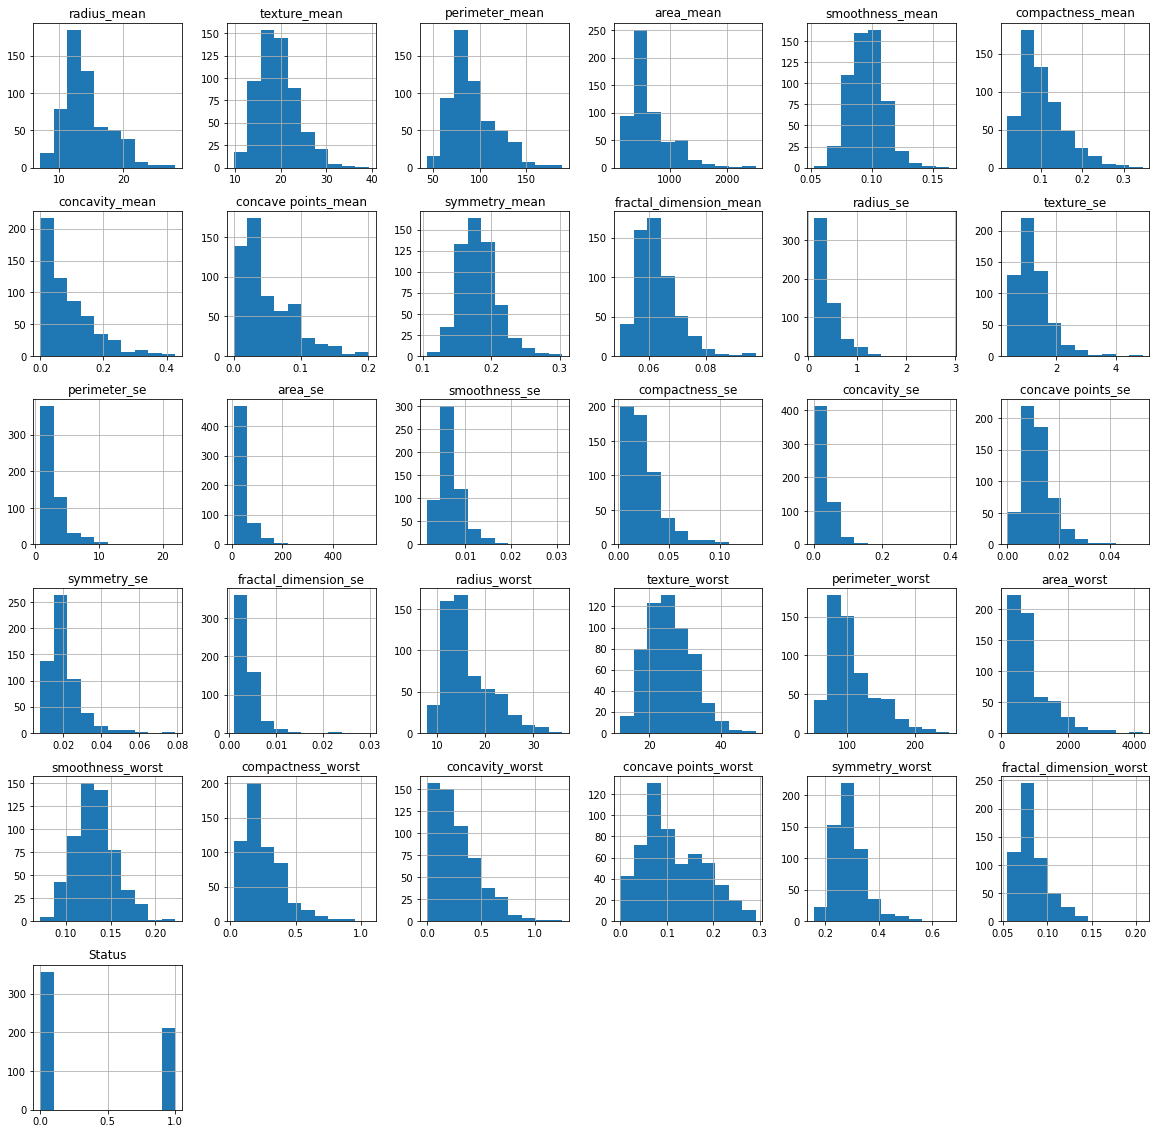

In [73]:
p = breast_cancer_data.hist(figsize = (20,20))

#### Skewness exists in the variables. Very few variables like 'Smoothness_mean' appear to be normally distributed.

A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

## Checking whether Linear Seperability exists in the features. Checking whether Logistic Regression Model would be right fit


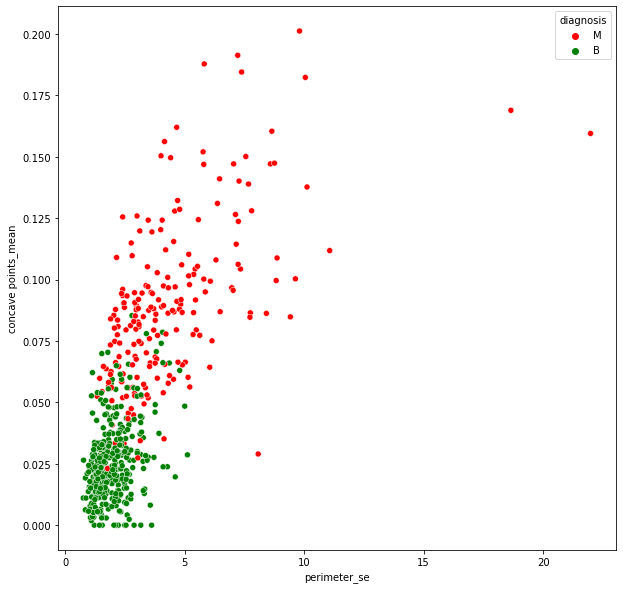

In [57]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="perimeter_se", y="concave points_mean", hue = "diagnosis", data = breast_cancer_data, palette =['red','green'])
plt.show()

#### This scatterplot clearly shows that there is linear seperability between these independent variables, i.e. a line can seperate these two categories of output variable 'diagnosis'.

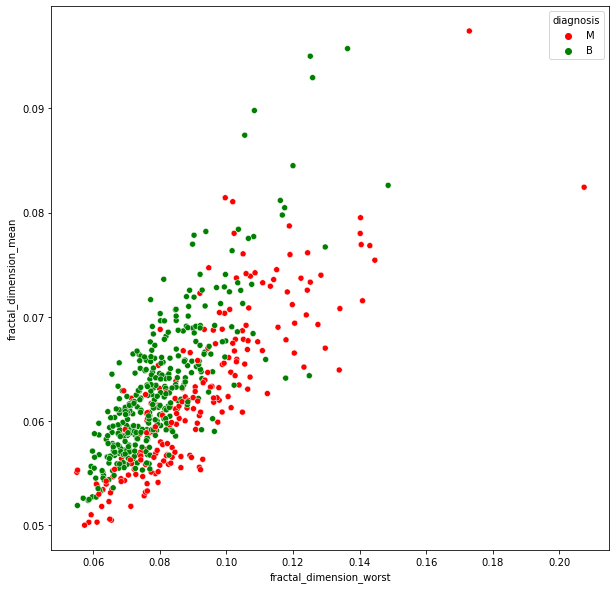

In [45]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(y="fractal_dimension_mean", x="fractal_dimension_worst", hue = "diagnosis", data = breast_cancer_data, palette =['red','green'])
plt.show()

#### Again, this plot shows that linear seperability exists. Logistic Regression can be suitably applied. With these pair of variables the classes are seperable by a linear boundary.

# DATA TRANSFORMATION

In [87]:
# Converting B->0 and M->1, in 'diagnosis' column
breast_cancer_data.loc[breast_cancer_data.diagnosis=='M','diagnosis'] = 1
breast_cancer_data.loc[breast_cancer_data.diagnosis=='B','diagnosis'] = 0

In [88]:
# diagnosis column goes into y-dataframe, everything else goes into X-dataframe
X = breast_cancer_data.loc[:, breast_cancer_data.columns != "diagnosis"]
y = breast_cancer_data.loc[:, breast_cancer_data.columns == "diagnosis"]

In [89]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Status'],
      dtype='object')

# Event Rate or Malignant cancer rate

In [91]:
y.mean()

diagnosis    0.372583
dtype: float64

#### 37% of all the cases, are malignant. This shows that the dataset is an imbalanced one. But, we can still do without Sampling.

# Outlier Treatment: Capping and Flooring of outliers

In [113]:
# function to clip the values at 2 percentile points
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [114]:
X=X.apply(lambda x : outlier_cap(x)) # applying this function as lambda across all the columns

In [125]:
X.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Status
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.113362,19.263470,91.889771,651.295227,0.096305,0.104193,0.088369,0.048689,0.181089,0.062729,...,25.659471,107.132718,876.073835,0.132252,0.252982,0.270579,0.114480,0.289473,0.083769,0.372583
std,3.439789,4.192831,23.752853,334.962197,0.013554,0.051881,0.078109,0.038033,0.026530,0.006721,...,5.996528,33.020473,548.004368,0.022165,0.151712,0.202652,0.065417,0.058421,0.017097,0.483918
min,8.458360,10.930400,53.827600,215.664000,0.068654,0.033351,0.000000,0.000000,0.129508,0.051504,...,15.200800,58.270400,256.192000,0.087910,0.050094,0.000000,0.000000,0.176028,0.058580,0.000000
1%,8.534955,10.936928,54.006032,219.428480,0.068774,0.033745,0.000000,0.000000,0.130183,0.051678,...,15.322656,58.331328,258.237440,0.087964,0.050275,0.000000,0.000000,0.177573,0.058627,0.000000
5%,9.529200,13.088000,60.496000,275.780000,0.075042,0.040660,0.004983,0.005621,0.141500,0.053926,...,16.574000,67.856000,331.060000,0.095734,0.071196,0.018360,0.024286,0.212700,0.062558,0.000000
10%,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,...,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000


# DATA EXPLORATION

### Feature Selection - Numerical Features
### Part 1 : Remove Features with 0 Variance

In [132]:
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(X)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
X = X.iloc[:,cols]

In [142]:
X.shape

(569, 31)

#### No features with 0 variance

In [149]:
# Changing the output variable to int data type
y=y.astype('int')

In [150]:
y.dtypes

diagnosis    int32
dtype: object

# MODEL DEVELOPMENT

# Train Test Split

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [152]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (398, 31)
Shape of Testing Data (171, 31)
Response Rate in Training Data diagnosis    0.384422
dtype: float64
Response Rate in Testing Data diagnosis    0.345029
dtype: float64


#### Response rates are similar in Training & Test data sets

In [153]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### Building a Decision Tree Model

In [159]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [160]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [60, 80, 100, 120, 140] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 3, 'min_samples_split': 60}


In [161]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=100)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=100, random_state=0)

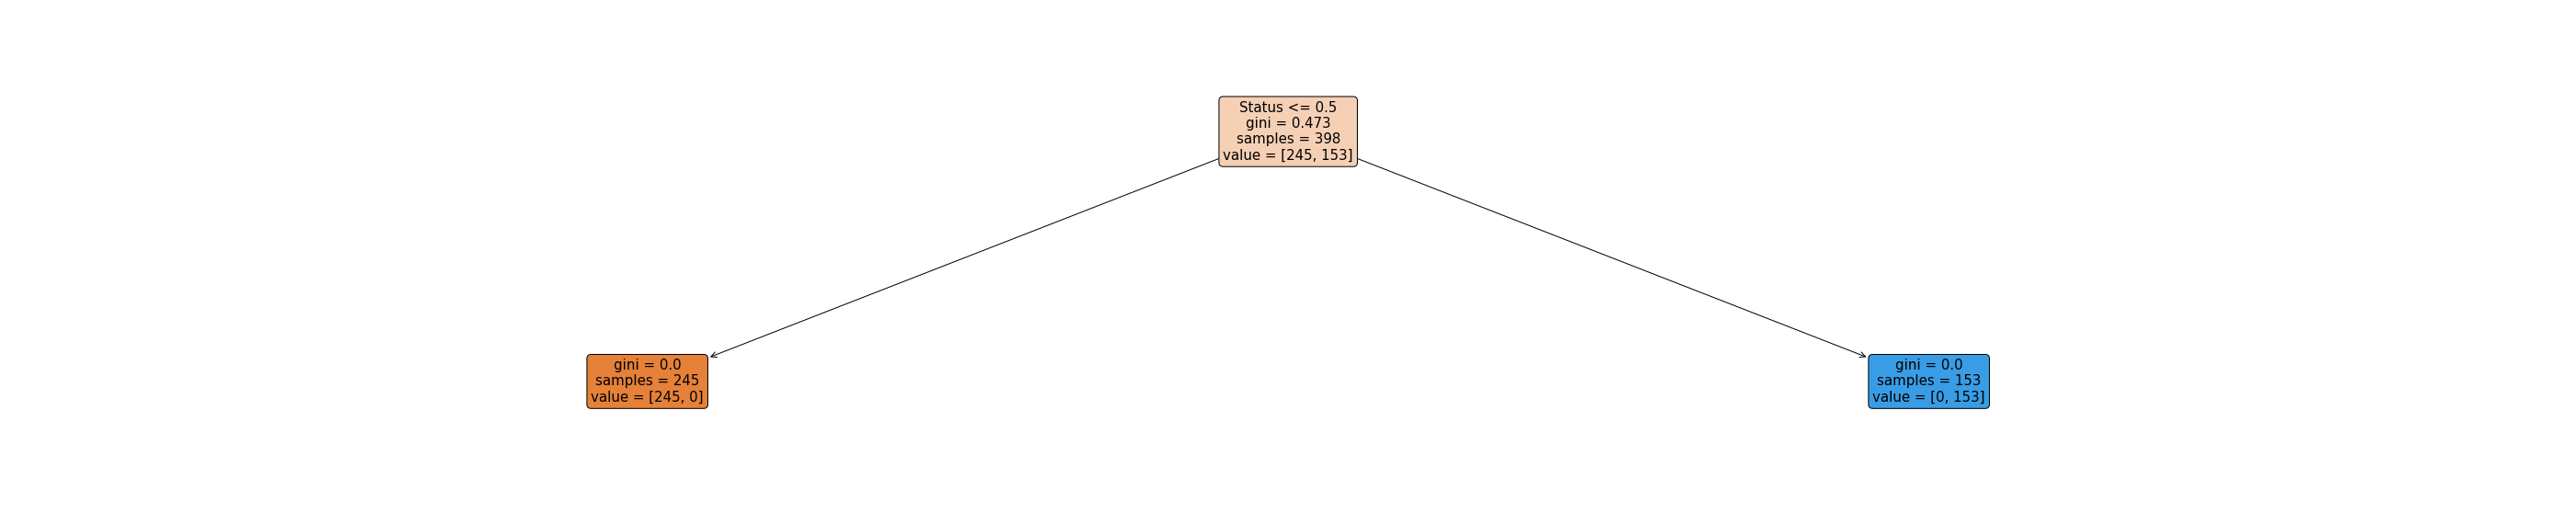

In [163]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X.columns)
plt.show()

### Building a Random Forest Model

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=100)
rf.fit(X_train,y_train)

<ipython-input-164-9c8915b1bb91>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=7, min_samples_split=100, random_state=0)

In [165]:
import pandas as pd   # Part of Data Exploration Step (Feature Selection)
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Status,0.251417
radius_worst,0.138797
area_worst,0.116759
concave points_worst,0.087794
perimeter_worst,0.080856
concave points_mean,0.079894
concavity_mean,0.075283
perimeter_mean,0.039944
radius_mean,0.033671
concavity_worst,0.016740


#### This is a list of features in the order of their importance, as obtained from Random Forest model.

### Building a Gradient Boosting Mode

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=7,min_samples_split=100)
gbm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(criterion='mse', max_depth=7, min_samples_split=100,
                           random_state=0)

In [167]:
import pandas as pd        # Part of Data Exploration Step (Feature Selection)
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Status,1.000000e+00
radius_mean,4.589032e-16
area_se,4.266171e-16
smoothness_se,3.786584e-16
radius_worst,3.288153e-16
concave points_mean,2.668167e-16
compactness_se,1.854464e-16
radius_se,1.613152e-16
smoothness_mean,1.582694e-16
symmetry_se,1.540322e-16


### Model Evaluation

In [168]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [169]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Logistic Regression model Results

In [170]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.9590643274853801
Precision 0.9482758620689655
Recall 0.9322033898305084
f1_score 0.94017094017094


# VISUALISATION & COMMUNICATION: Confusion Matrix & ROC Curve

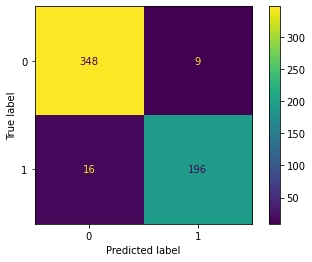

In [171]:
# Confusion Matrix for entire dataset, obtained from Logistic Regression model
metrics.plot_confusion_matrix(logreg,X,y)

## Decision Tree Model results

In [172]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 1.0
Precision 1.0
Recall 1.0
f1_score 1.0


#### Decision Tree gives 100% accurate results. All metrics obtained are 100%.

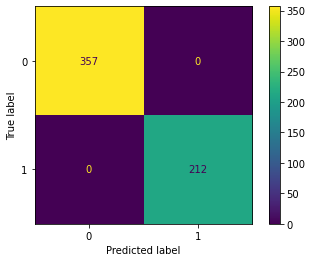

In [174]:
metrics.plot_confusion_matrix(dtree,X,y)

## Random Forest results

In [175]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9883040935672515
Precision 0.9672131147540983
Recall 1.0
f1_score 0.9833333333333333


#### 100% Recall obtained by Random Forest model as well.

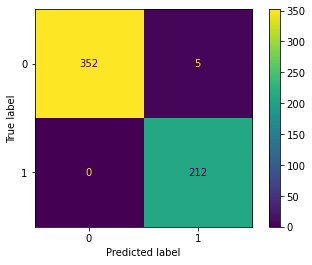

In [176]:
metrics.plot_confusion_matrix(rf,X,y)

## GBM(Gradient Boosting Machines) results

In [177]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 1.0
Precision 1.0
Recall 1.0
f1_score 1.0


#### 100% accurate results obtained by applying GBM (Gradient Boosting Algorithm) model

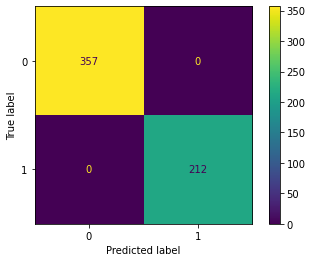

In [178]:
metrics.plot_confusion_matrix(gbm,X,y)

## ROC curve for Logistic Regression Model

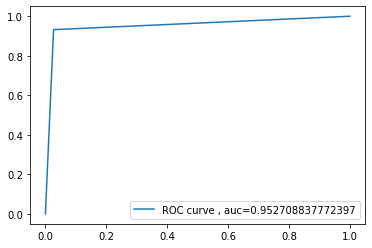

0.952708837772397

In [179]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred_logreg)
auc = metrics.roc_auc_score(y_test, y_pred_logreg) #Area under the curve using this function
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()
auc

#### AUC (Area Under Curve) for ROC curve obtained by Logistic Regression model is 0.95.  Very reliable performance by the model.

## ROC curve for Decision Tree

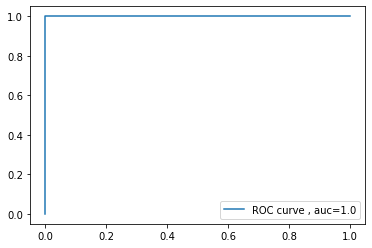

1.0

In [180]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred_tree)
auc = metrics.roc_auc_score(y_test, y_pred_tree ) #Area under the curve using this function
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()
auc

#### AUC (Area Under Curve) for ROC curve obtained by Decision Tree model is 1. Ideal performance by this model.

## ROC curve for Random Forest

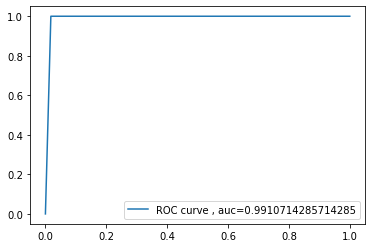

0.9910714285714285

In [181]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred_rf)
auc = metrics.roc_auc_score(y_test, y_pred_rf) #Area under the curve using this function
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()
auc

#### AUC (Area Under Curve) for ROC curve obtained by Random Forest model is 0.99. Very reliable performance by this model.

## ROC curve for GBM model

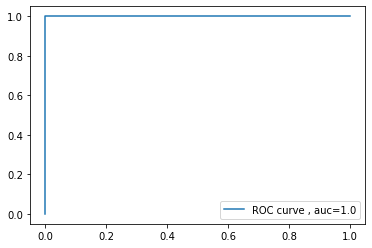

1.0

In [182]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred_gbm )
auc = metrics.roc_auc_score(y_test, y_pred_gbm ) #Area under the curve using this function
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()
auc

#### AUC (Area Under Curve) for ROC curve obtained by Decision Tree model is 1. Ideal performance by this model.

# CONCLUSIONS:
- Recall is an ideal metric for Breast cancer detection. Recall also gives a measure of how accurately our model is able to identify the relevant data. We refer to it as Sensitivity or True Positive Rate.
- GBM, Random Forest & Decision Tree models give 100% Recall values.